#NLP Lab_06 - Dense Vector (Embedding)

* Name: Nileem Kaveramma C C
Roll No.: 2348441

* Word2Vec (Prediction based models) - k position away from center word - context words.
May use k between 2 to 5 for large corpus collections
1. Plot the similarity scores of N chosen words from the collections.


In [ ]:
pip install gensim matplotlib


Similarity plot for Skip-gram model:


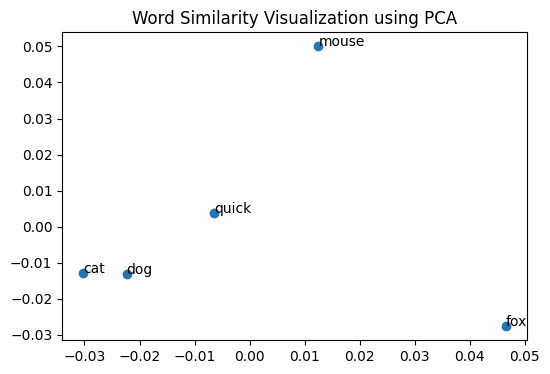

Similarity plot for CBoW model:


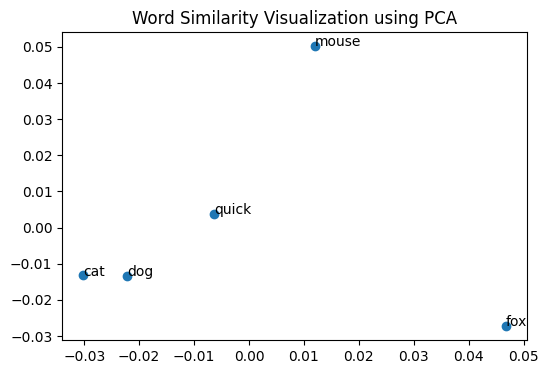

In [ ]:
import gensim
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

# Sample corpus
sentences = [
    ['the', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog'],
    ['the', 'dog', 'barked', 'at', 'the', 'fox'],
    ['the', 'cat', 'chased', 'the', 'mouse'],
    ['the', 'mouse', 'ran', 'away', 'from', 'the', 'cat'],
    ['the', 'dog', 'ran', 'after', 'the', 'fox'],
    ['the', 'fox', 'is', 'quick', 'and', 'smart'],
    ['the', 'dog', 'is', 'loyal', 'and', 'friendly']
]

# Train Word2Vec models for Skip-gram (sg=1) and CBoW (sg=0)
model_skipgram = Word2Vec(sentences, vector_size=100, window=5, min_count=1, sg=1)
model_cbow = Word2Vec(sentences, vector_size=100, window=5, min_count=1, sg=0)

# Function to plot similarity scores for N words
def plot_word_similarity(model, words):
    # Use PCA to reduce the dimensionality of the word vectors for plotting
    word_vectors = np.array([model.wv[word] for word in words])
    pca = PCA(n_components=2)
    reduced_vectors = pca.fit_transform(word_vectors)

    plt.figure(figsize=(6, 4))
    plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1])

    for i, word in enumerate(words):
        plt.annotate(word, (reduced_vectors[i, 0], reduced_vectors[i, 1]))

    plt.title('Word Similarity Visualization using PCA')
    plt.show()

# N words to plot
n_words = ['fox', 'dog', 'cat', 'mouse', 'quick']

# Plot similarity scores for Skip-gram model
print("Similarity plot for Skip-gram model:")
plot_word_similarity(model_skipgram, n_words)

# Plot similarity scores for CBoW model
print("Similarity plot for CBoW model:")
plot_word_similarity(model_cbow, n_words)


2. Find the closest N words for a given word X.
Use skip-gram and CBoW for the above processes.

In [ ]:
import gensim
from gensim.models import Word2Vec

# Sample corpus
sentences = [
    ['the', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog'],
    ['the', 'dog', 'barked', 'at', 'the', 'fox'],
    ['the', 'cat', 'chased', 'the', 'mouse'],
    ['the', 'mouse', 'ran', 'away', 'from', 'the', 'cat'],
    ['the', 'dog', 'ran', 'after', 'the', 'fox'],
    ['the', 'fox', 'is', 'quick', 'and', 'smart'],
    ['the', 'dog', 'is', 'loyal', 'and', 'friendly']
]

# Train Word2Vec models for Skip-gram (sg=1) and CBoW (sg=0)
model_skipgram = Word2Vec(sentences, vector_size=100, window=5, min_count=1, sg=1)
model_cbow = Word2Vec(sentences, vector_size=100, window=5, min_count=1, sg=0)

# Function to find closest N words to a given word X
def find_closest_words(model, word, topn=5):
    try:
        similar_words = model.wv.most_similar(word, topn=topn)
        print(f"Closest {topn} words to '{word}':")
        for word, similarity in similar_words:
            print(f"{word}: {similarity:.4f}")
    except KeyError:
        print(f"'{word}' not in vocabulary")

# Find closest words for a given word using Skip-gram
print("Closest words using Skip-gram model:")
find_closest_words(model_skipgram, 'dog', topn=5)

# Find closest words for a given word using CBoW
print("\nClosest words using CBoW model:")
find_closest_words(model_cbow, 'dog', topn=5)


Closest words using Skip-gram model:
Closest 5 words to 'dog':
and: 0.1992
after: 0.1730
quick: 0.1702
jumps: 0.1529
smart: 0.1499

Closest words using CBoW model:
Closest 5 words to 'dog':
and: 0.1992
after: 0.1728
quick: 0.1701
jumps: 0.1529
smart: 0.1489
